# Sentiment Analysis 

This part of project is all about using sentiment analysis to understand financial news and make decisions on stocks. We have used finviz.com to gather all article titles.

## Parsing Article Data

In [40]:
#import necessary packages

#!pip install bs4
#! pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#! pip install matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#! pip install wordcloud
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import yfinance as yf
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#raw url
finviz_url = 'https://finviz.com/quote.ashx?t='

In [41]:
tickers = ['AAPL','TSLA']

In [10]:
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response =urlopen(req)
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    

In [38]:
#news_table

In [11]:
parsed_data = []
for ticker, news_table in news_tables.items():
    if news_table:
        for row in news_table.findAll('tr'):
            title = row.a.get_text(strip=True) if row.a else "N/A"
            date_data = row.td.get_text(strip=True).split(' ') if row.td else ["N/A"]

            date = ""
            time = ""

            if len(date_data) == 1:
                time = date_data[0]
            elif len(date_data) > 1:
                date = date_data[0]
                time = date_data[1]
            
            parsed_data.append([ticker, date, time, title])
    else:
        print(f"No news table found for ticker: {ticker}")


In [52]:
#parsed_data

In [12]:
#create a dataframe
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

In [13]:
df

,ticker,date,time,title
0,AAPL,Today,11:30AM,Better Tech Stock: Alphabet vs. Apple
1,AAPL,,09:58AM,Goldman Sachs Top 15 Stock Picks for 2024
2,AAPL,,08:00AM,"Swiss Central Bank Slashed AMC Stake, Sells Ap..."
3,AAPL,,07:30AM,'We won't be able to uninvent it': Warren Buff...
4,AAPL,,07:24AM,20 Most Disabled-Friendly Countries in the World
...,...,...,...,...
201,TSLA,,01:05PM,20 Countries That Import The Most Cars In The ...
202,TSLA,,12:44PM,Chile Discusses IRA Benefits With US to Lure L...
203,TSLA,,12:44PM,TSLA Stock Alert: Why Jefferies Says Tesla Sho...
204,TSLA,,12:25PM,Why Lucid Group Stock Popped This Morning


In [14]:
df.to_csv('my_raw_df7.csv', index=False)

In [15]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/my_raw_df7.csv', index=False)

## Pre-processing

In [16]:

# Define the current date
current_date = datetime.now().date()

# Replace "Today" with the current date
df['date'] = df['date'].replace('Today', current_date)

# Convert existing date strings to datetime objects
# The format '%b-%d-%y' parses dates in the form "Oct-30-23"

df['date'] = pd.to_datetime(df['date'], format='%b-%d-%y', errors='ignore')

# Now forward fill the missing dates
df['date'] = df['date'].ffill()

# Next, ensure the 'time' column is formatted properly
df['time'] = df['time'].str.replace(r'(AM|PM)', r' \1', regex=True)

# Combine the date and time into a single datetime column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])




In [17]:
df

,ticker,date,time,title,datetime
0,AAPL,2023-11-26,11:30 AM,Better Tech Stock: Alphabet vs. Apple,2023-11-26 11:30:00
1,AAPL,2023-11-26,09:58 AM,Goldman Sachs Top 15 Stock Picks for 2024,2023-11-26 09:58:00
2,AAPL,2023-11-26,08:00 AM,"Swiss Central Bank Slashed AMC Stake, Sells Ap...",2023-11-26 08:00:00
3,AAPL,2023-11-26,07:30 AM,'We won't be able to uninvent it': Warren Buff...,2023-11-26 07:30:00
4,AAPL,2023-11-26,07:24 AM,20 Most Disabled-Friendly Countries in the World,2023-11-26 07:24:00
...,...,...,...,...,...
201,TSLA,2023-11-20,01:05 PM,20 Countries That Import The Most Cars In The ...,2023-11-20 13:05:00
202,TSLA,2023-11-20,12:44 PM,Chile Discusses IRA Benefits With US to Lure L...,2023-11-20 12:44:00
203,TSLA,2023-11-20,12:44 PM,TSLA Stock Alert: Why Jefferies Says Tesla Sho...,2023-11-20 12:44:00
204,TSLA,2023-11-20,12:25 PM,Why Lucid Group Stock Popped This Morning,2023-11-20 12:25:00


In [18]:
# Save the DataFrame to a CSV file
df.to_csv('my_dataframe8.csv', index=False)

In [19]:
df_loaded = pd.read_csv('my_dataframe8.csv')

df_loaded

,ticker,date,time,title,datetime
0,AAPL,2023-11-26,11:30 AM,Better Tech Stock: Alphabet vs. Apple,2023-11-26 11:30:00
1,AAPL,2023-11-26,09:58 AM,Goldman Sachs Top 15 Stock Picks for 2024,2023-11-26 09:58:00
2,AAPL,2023-11-26,08:00 AM,"Swiss Central Bank Slashed AMC Stake, Sells Ap...",2023-11-26 08:00:00
3,AAPL,2023-11-26,07:30 AM,'We won't be able to uninvent it': Warren Buff...,2023-11-26 07:30:00
4,AAPL,2023-11-26,07:24 AM,20 Most Disabled-Friendly Countries in the World,2023-11-26 07:24:00
...,...,...,...,...,...
201,TSLA,2023-11-20,01:05 PM,20 Countries That Import The Most Cars In The ...,2023-11-20 13:05:00
202,TSLA,2023-11-20,12:44 PM,Chile Discusses IRA Benefits With US to Lure L...,2023-11-20 12:44:00
203,TSLA,2023-11-20,12:44 PM,TSLA Stock Alert: Why Jefferies Says Tesla Sho...,2023-11-20 12:44:00
204,TSLA,2023-11-20,12:25 PM,Why Lucid Group Stock Popped This Morning,2023-11-20 12:25:00


In [20]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/my_dataframe8.csv', index=False)

Combine all news extracted from website during 2 weeks:

In [53]:
my_dataframe1 = pd.read_csv('my_dataframe1.csv')
my_dataframe2 = pd.read_csv('my_dataframe2.csv')
my_dataframe3 = pd.read_csv('my_dataframe3.csv')
my_dataframe4 = pd.read_csv('my_dataframe4.csv')
my_dataframe5 = pd.read_csv('my_dataframe5.csv')
my_dataframe6 = pd.read_csv('my_dataframe6.csv')
my_dataframe7 = pd.read_csv('my_dataframe7.csv')
my_dataframe8 = pd.read_csv('my_dataframe8.csv')

In [54]:
# Concatenating all dataframes
concatenated_df = pd.concat([
        my_dataframe1, my_dataframe2, my_dataframe3,
        my_dataframe4, my_dataframe5, my_dataframe6,
        my_dataframe7, my_dataframe8
        
    ])

In [55]:
concatenated_df

,ticker,date,time,title,datetime
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00
3,AAPL,2023-11-03,06:29 PM,Weekly Roundup,2023-11-03 18:29:00
4,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00
...,...,...,...,...,...
201,TSLA,2023-11-20,01:05 PM,20 Countries That Import The Most Cars In The ...,2023-11-20 13:05:00
202,TSLA,2023-11-20,12:44 PM,Chile Discusses IRA Benefits With US to Lure L...,2023-11-20 12:44:00
203,TSLA,2023-11-20,12:44 PM,TSLA Stock Alert: Why Jefferies Says Tesla Sho...,2023-11-20 12:44:00
204,TSLA,2023-11-20,12:25 PM,Why Lucid Group Stock Popped This Morning,2023-11-20 12:25:00


In [56]:
# Removing duplicates
df = concatenated_df.drop_duplicates()

In [57]:
df

,ticker,date,time,title,datetime
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00
3,AAPL,2023-11-03,06:29 PM,Weekly Roundup,2023-11-03 18:29:00
4,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00
...,...,...,...,...,...
163,TSLA,2023-11-22,08:56 AM,NYC Comptroller urges Tesla board to hold Elon...,2023-11-22 08:56:00
164,TSLA,2023-11-22,08:05 AM,Ford CEO Jim Farley slashes plans for new batt...,2023-11-22 08:05:00
165,TSLA,2023-11-22,08:00 AM,Rival of Tesla and BYD launches low-priced com...,2023-11-22 08:00:00
166,TSLA,2023-11-22,07:09 AM,Cathie Wood Just Called This Company the Bigge...,2023-11-22 07:09:00


In [26]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/main_df.csv', index=False)

## Exploratory Data Analysis (EDA)

In [58]:
# Check data types of each column
data_types = df.dtypes

# Determine the dataset's shape
data_shape = df.shape

# Identify any missing values
missing_values = df.isnull().sum()

# Get a statistical summary for any numerical columns
statistical_summary = df.describe()

# Look at the number of unique values for each column
unique_values = df.nunique()

(data_types, data_shape, missing_values, statistical_summary, unique_values)


(ticker      object
 date        object
 time        object
 title       object
 datetime    object
 dtype: object,
 (1168, 5),
 ticker       0
 date         0
 time         0
 title       47
 datetime     0
 dtype: int64,
        ticker        date      time  \
 count    1168        1168      1168   
 unique      2          27       634   
 top      AAPL  2023-11-03  05:00 AM   
 freq      597         105        16   
 
                                                     title             datetime  
 count                                                1121                 1168  
 unique                                               1077                 1031  
 top     Warren Buffett Stocks: What's Inside Berkshire...  2023-11-20 05:00:00  
 freq                                                    4                    7  ,
 ticker         2
 date          27
 time         634
 title       1077
 datetime    1031
 dtype: int64)

Based on the EDA steps we performed, here are the findings:

Data Types:

All columns in the DataFrame are of object type, which is typical for strings in pandas. This includes the date, time, and datetime columns, which you may want to convert to datetime type for any time series analysis.
Data Shape:

The DataFrame contains 1168 rows and 5 columns.
Missing Values:

There are 47 missing values in the title column. All other columns do not have missing values.
Statistical Summary:

Since there are no numerical columns, the statistical summary only provides counts, unique values, top (most frequent) values, and frequency of the top value for categorical columns.
There are 2 unique ticker symbols.
The date with the most articles is 2023-11-03.
The most common time for articles to be published is 05:00 AM.
The title "Warren Buffett Stocks: What's Inside Berkshire..." appears 4 times, making it the most frequent title in the dataset.
Unique Values:

There are 2 unique ticker symbols indicating the dataset contains articles for two different companies.
There are 27 unique dates, suggesting the articles cover a span of 27 different days.
There are 634 unique times, indicating a variety of publication times.
There are 1077 unique titles out of 1121 non-null entries, suggesting that there are some duplicate titles.
There are 1031 unique datetime entries, which suggests some articles might have been published at the exact same date and time.

In [59]:
#remove missing rows

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 167
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    1121 non-null   object
 1   date      1121 non-null   object
 2   time      1121 non-null   object
 3   title     1121 non-null   object
 4   datetime  1121 non-null   object
dtypes: object(5)
memory usage: 52.5+ KB


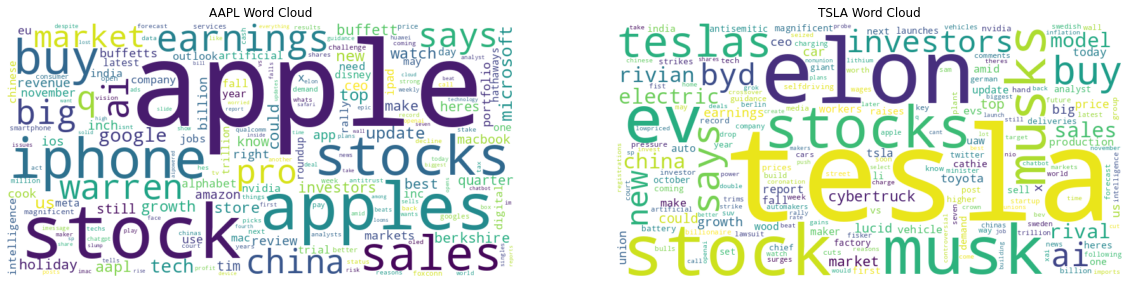

In [60]:
# NLTK list of stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and split text into words, excluding stopwords
def clean_and_split(text):
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert text to lower case and split into words
    words = text.lower().split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

# Function to generate a word cloud from titles of a specific ticker
def generate_wordcloud_for_ticker(dataframe, ticker):
    # Filter the dataframe for the given ticker
    ticker_titles = dataframe[dataframe['ticker'] == ticker]['title'].dropna().str.cat(sep=' ')
    # Clean and split the text into words
    ticker_words = clean_and_split(ticker_titles)
    # Count the frequency of each word
    ticker_word_counts = Counter(ticker_words)
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ticker_word_counts)
    return wordcloud

# Generate word clouds for both AAPL and TSLA
wordcloud_aapl = generate_wordcloud_for_ticker(df, 'AAPL')
wordcloud_tsla = generate_wordcloud_for_ticker(df, 'TSLA')

# Display the word clouds using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# AAPL word cloud
axs[0].imshow(wordcloud_aapl, interpolation='bilinear')
axs[0].set_title('AAPL Word Cloud')
axs[0].axis('off')

# TSLA word cloud
axs[1].imshow(wordcloud_tsla, interpolation='bilinear')
axs[1].set_title('TSLA Word Cloud')
axs[1].axis('off')

plt.show()


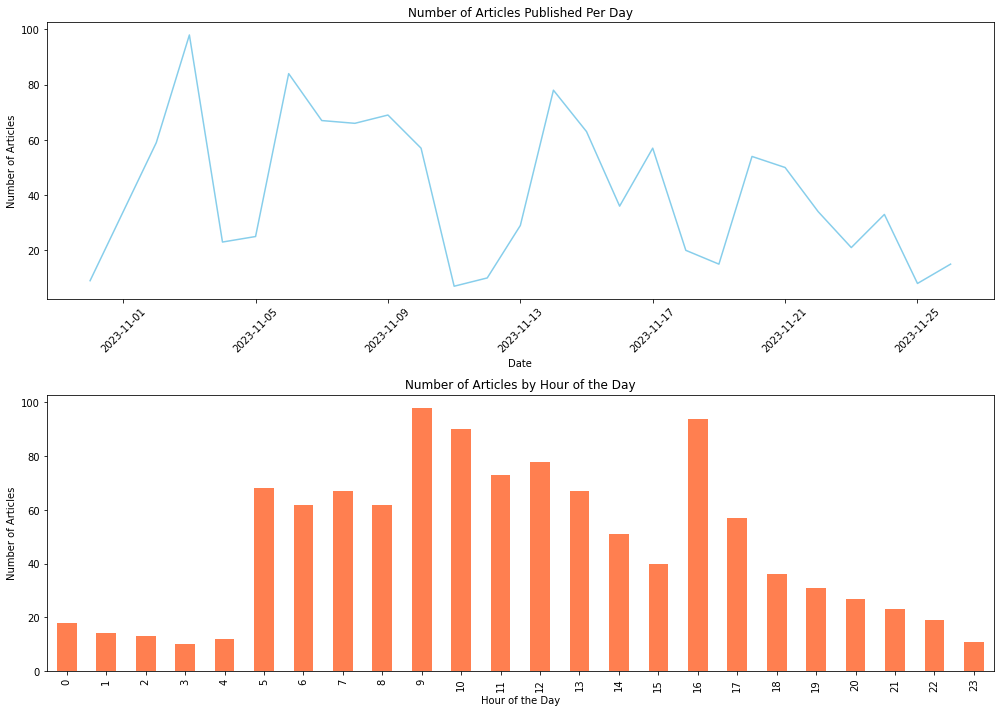

In [68]:
# Ignore the "SettingWithCopyWarning" warnings
pd.options.mode.chained_assignment = None  # Turn off the warnings

# Convert 'date' and 'datetime' columns to datetime objects
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Add an 'hour' column based on the 'datetime' column
df['hour'] = df['datetime'].dt.hour

# Restore the warning setting to its default after the DataFrame modifications
pd.options.mode.chained_assignment = 'warn'

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Temporal Analysis: Number of articles published per day
articles_per_day = df.groupby(df['date'].dt.date).size()

# Temporal Analysis: Number of articles by hour of the day
articles_per_hour = df.groupby('hour').size()

# Plotting the number of articles published per day
articles_per_day.plot(kind='line', ax=ax[0], color='skyblue')
ax[0].set_title('Number of Articles Published Per Day')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Articles')
ax[0].tick_params(axis='x', rotation=45)

# Plotting the number of articles by hour of the day
articles_per_hour.plot(kind='bar', ax=ax[1], color='coral')
ax[1].set_title('Number of Articles by Hour of the Day')
ax[1].set_xlabel('Hour of the Day')
ax[1].set_ylabel('Number of Articles')

# Adjust layout
plt.tight_layout()
plt.show()

The two visuals illustrate:

Number of Articles Published Per Day:

A line chart showing the variation in the number of articles published each day.
Number of Articles by Hour of the Day:

A bar chart displaying the distribution of articles across different hours of the day.

In [70]:
df

,ticker,date,time,title,datetime,hour
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00,1
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00,20
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00,20
3,AAPL,2023-11-03,06:29 PM,Weekly Roundup,2023-11-03 18:29:00,18
4,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00,18
...,...,...,...,...,...,...
163,TSLA,2023-11-22,08:56 AM,NYC Comptroller urges Tesla board to hold Elon...,2023-11-22 08:56:00,8
164,TSLA,2023-11-22,08:05 AM,Ford CEO Jim Farley slashes plans for new batt...,2023-11-22 08:05:00,8
165,TSLA,2023-11-22,08:00 AM,Rival of Tesla and BYD launches low-priced com...,2023-11-22 08:00:00,8
166,TSLA,2023-11-22,07:09 AM,Cathie Wood Just Called This Company the Bigge...,2023-11-22 07:09:00,7


## Removing irrevelant news
The code is used to organize and categorize news articles based on their titles and ticker symbols, allowing us to focus on news that is relevant to Apple, Tesla, or other topics of interest. It helps in conducting sentiment analysis or other analyses specific to each company.

In [72]:
# Define the keyword lists for Apple and Tesla
apple_keywords = [
    "Apple Inc.",
    "iPhone",
    "Apple",
    "iPad",
    "Mac",
    "iOS",
    "macOS",
    "Apple Watch",
    "Apple Services",
    "App Store",
    "Apple Music",
    "AirPods",
    "iMac",
    "MacBook",
    "Tim Cook",
    "Steve Jobs",
    "Innovation",
    "Technology",
    "Consumer Electronics",
    "Stock",
    "Earnings Report",
    "Product Launch",
    "App Development",
    "iOS Apps",
    "Hardware",
    "Software",
    "Competition",
    "Consumer Sentiment"
]

tesla_keywords = [
    "Tesla Inc.",
    "Tesla",
    "Electric vehicles",
    "EV",
    "Tesla Model S",
    "Tesla Model 3",
    "Tesla Model X",
    "Tesla Model Y",
    "Autopilot",
    "Elon Musk",
    "Gigafactories",
    "Battery technology",
    "Tesla stock",
    "Renewable energy",
    "Solar energy",
    "Charging infrastructure",
    "Environmental impact",
    "Tesla earnings",
    "Competition",
    "Tesla Semi",
    "Electric car market",
    "Sustainable transportation",
    "Innovation",
    "Green energy",
    "EV Charging",
    "Clean energy",
    "Energy storage"
]
# Function to check if a title contains any keywords from a given list
def contains_keywords(title, keywords):
    title = title.lower()
    return any(keyword.lower() in title for keyword in keywords)

# Filter news articles related to Apple
apple_mask = df['ticker'] == 'AAPL'
apple_news = df[apple_mask][df[apple_mask]['title'].apply(lambda x: contains_keywords(x, apple_keywords))].reset_index(drop=True)

# Filter news articles related to Tesla
tesla_mask = df['ticker'] == 'TSLA'
tesla_news = df[tesla_mask][df[tesla_mask]['title'].apply(lambda x: contains_keywords(x, tesla_keywords))].reset_index(drop=True)

# Optional: Filter news articles not related to Apple or Tesla
other_mask = ~df['title'].apply(lambda x: contains_keywords(x, apple_keywords + tesla_keywords))
other_news = df[other_mask].reset_index(drop=True)

print("Apple News:")
print(apple_news)

print("\nTesla News:")
print(tesla_news)

print("\nOther News:")
print(other_news)

Apple News:
    ticker       date      time  \
0     AAPL 2023-11-03  01:04 AM   
1     AAPL 2023-11-03  08:32 PM   
2     AAPL 2023-11-03  08:32 PM   
3     AAPL 2023-11-03  06:17 PM   
4     AAPL 2023-11-03  05:01 PM   
..     ...        ...       ...   
427   AAPL 2023-11-22  08:23 AM   
428   AAPL 2023-11-22  07:44 AM   
429   AAPL 2023-11-22  07:19 AM   
430   AAPL 2023-11-22  06:00 AM   
431   AAPL 2023-11-21  09:50 PM   

                                                 title            datetime  \
0    The Apple Inc (AAPL) Company: A Short SWOT Ana... 2023-11-03 01:04:00   
1    Jim Cramer gets to the core of Apple after ear... 2023-11-03 20:32:00   
2     I wanna own Apple, not trade it, says Jim Cramer 2023-11-03 20:32:00   
3    The Score: Six Flags, Apple, WeWork and More S... 2023-11-03 18:17:00   
4    Initial Impression From Apple's 4Q23 Earnings,... 2023-11-03 17:01:00   
..                                                 ...                 ...   
427                  

In [73]:
# Remove the "Other News" DataFrame
df = pd.concat([apple_news, tesla_news], ignore_index=True)
df

,ticker,date,time,title,datetime,hour
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00,1
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00,20
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00,20
3,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00,18
4,AAPL,2023-11-03,05:01 PM,"Initial Impression From Apple's 4Q23 Earnings,...",2023-11-03 17:01:00,17
...,...,...,...,...,...,...
855,TSLA,2023-11-22,09:48 AM,Tesla Chief Elon Musk's legal troubles mount w...,2023-11-22 09:48:00,9
856,TSLA,2023-11-22,08:56 AM,NYC Comptroller urges Tesla board to hold Elon...,2023-11-22 08:56:00,8
857,TSLA,2023-11-22,08:05 AM,Ford CEO Jim Farley slashes plans for new batt...,2023-11-22 08:05:00,8
858,TSLA,2023-11-22,08:00 AM,Rival of Tesla and BYD launches low-priced com...,2023-11-22 08:00:00,8


## News Summarization

Below is an extra section that provides a solution for text summarization using pre-trained T5 models and tokenizers from the Hugging Face Transformers library. While our news data is already summarized, these codes can be useful in case we need to summarize longer news articles or texts. The generate_summaries function takes a list of texts, encodes them for summarization using a T5 model, and generates summaries. It's a versatile tool for various natural language processing tasks, including text summarization.

In [10]:
#! pip install torch torchvision torchaudio

In [11]:
from transformers import pipeline

C:\Users\Mohammad\anaconda3\envs\graphviz\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
import torch
print(torch.__version__)

2.1.1+cpu


In [71]:
#! pip install tensorflow
#! pip install tensorflow_hub
#! pip install tensorflow_text
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#! pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html
#! pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install sentencepiece

In [13]:
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub


In [14]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

In [15]:
# Load the pre-trained T5 model and tokenizer
from transformers import T5Tokenizer, T5ForConditionalGeneration
# Initialize the T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")


tokenizer_config.json: 100%|███████████████████████████████████████████████████████| 2.32k/2.32k [00:00<00:00, 468kB/s]
C:\Users\Mohammad\anaconda3\envs\graphviz\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mohammad\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
spiece.mo

In [16]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")

model.safetensors: 100%|████████████████████████████████████████████████████████████| 242M/242M [00:04<00:00, 57.1MB/s]
generation_config.json: 100%|█████████████████████████████████████████████████████████| 147/147 [00:00<00:00, 46.5kB/s]


In [29]:
def generate_summaries(texts):
    inputs = tokenizer.encode(["summarize: " + text for text in texts], return_tensors="pt", max_length=512, truncation=True, padding=True)
    summary_ids = model.generate(inputs, max_length=30, min_length=20, length_penalty=2.0, num_beams=4, early_stopping=True)
    summaries = [tokenizer.decode(summary_id, skip_special_tokens=True) for summary_id in summary_ids]
    return summaries

In [19]:
from concurrent.futures import ThreadPoolExecutor

In [30]:
# Create a ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=4) as executor:
    # Use the executor to map the generate_summary function to the titles
    summaries = list(executor.map(generate_summary, df['title']))

In [31]:
# Assign the summaries to the 'title_summary' column
df.loc[:, 'title_summary'] = summaries

In [32]:
# Check if 'title' and 'title_summary' are similar for the first few rows
for index, row in df.head().iterrows():
    title = row['title']
    title_summary = row['title_summary']
    print(f'Title: {title}')
    print(f'Title Summary: {title_summary}')
    print(f'Are they similar? {title == title_summary}\n')

Title: The Apple Inc (AAPL) Company: A Short SWOT Analysis
Title Summary: the apple Inc (AAPL) Company: A Short SWOT Analysis. a short SWOT analysis of the company's SWOT analysis. a short SWOT analysis of the SWOT analysis.
Are they similar? False

Title: Jim Cramer gets to the core of Apple after earnings
Title Summary: Jim Cramer gets to the core of apple after earnings. he gets to the core of apple after earnings. he gets to the core of apple after earnings. he gets to the core of apple.
Are they similar? False

Title: I wanna own Apple, not trade it, says Jim Cramer
Title Summary: i wanna own Apple, not trade it, says Jim Cramer. i wanna own apple, not trade it, says Cramer. i wanna own apple, not trade it, says cramer.
Are they similar? False

Title: Weekly Roundup
Title Summary: Weekly Roundup: Weekly Roundups from around the world. Weekly Roundup: Weekly Roundup: weekly roundup: weekly roundup: weekly roundup: weekly roundup: weekly roundup: weekly roundup: weekly roundup: week

## Sentiment Analysis

We are using lambda function with the VADER sentiment analysis tool from the nltk library to calculate the compound sentiment score for each title in a dataframe.
- A positive score indicates a positive sentiment.
- A negative score indicates a negative sentiment.
- A score around 0 indicates a neutral sentiment.

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
vader = SentimentIntensityAnalyzer()

In [74]:
f = lambda title: vader.polarity_scores(title)['compound']
df = df.copy()
df['compound'] = df['title'].apply(f)
df.loc[:, 'compound'] = df['title'].apply(f)

In [75]:
df

,ticker,date,time,title,datetime,hour,compound
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00,1,0.0000
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00,20,0.0000
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00,20,0.0000
3,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00,18,0.0000
4,AAPL,2023-11-03,05:01 PM,"Initial Impression From Apple's 4Q23 Earnings,...",2023-11-03 17:01:00,17,0.2263
...,...,...,...,...,...,...,...
855,TSLA,2023-11-22,09:48 AM,Tesla Chief Elon Musk's legal troubles mount w...,2023-11-22 09:48:00,9,0.0772
856,TSLA,2023-11-22,08:56 AM,NYC Comptroller urges Tesla board to hold Elon...,2023-11-22 08:56:00,8,0.0000
857,TSLA,2023-11-22,08:05 AM,Ford CEO Jim Farley slashes plans for new batt...,2023-11-22 08:05:00,8,-0.2023
858,TSLA,2023-11-22,08:00 AM,Rival of Tesla and BYD launches low-priced com...,2023-11-22 08:00:00,8,0.0000


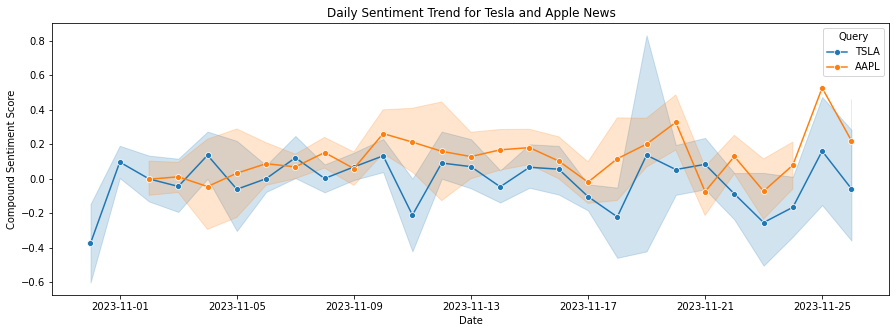

In [76]:
# Convert 'Date' to datetime and sort the DataFrame
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by='date')

# Plotting
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y='compound', hue='ticker', data=df_sorted, marker='o')
plt.title('Daily Sentiment Trend for Tesla and Apple News')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score')
plt.legend(title='Query')
plt.show()

The line plot illustrating the daily sentiment trend for news articles related to different ticker symbols (e.g., Tesla and Apple) has been successfully generated.

In the plot, each line represents a ticker symbol, and the variation in the compound sentiment scores over time is shown. The compound sentiment score is a measure of the sentiment of the news titles, ranging from -1 (very negative) to +1 (very positive).

In [47]:
#df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/df.csv', index=False)

Calculate the mean compound score for each day:

In [77]:
mean_df = df.groupby(['ticker', 'date'])['compound'].mean().reset_index()

In [78]:
mean_df

,ticker,date,compound
0,AAPL,2023-11-02,-0.002984
1,AAPL,2023-11-03,0.011203
2,AAPL,2023-11-04,-0.045373
3,AAPL,2023-11-05,0.032000
4,AAPL,2023-11-06,0.087381
5,AAPL,2023-11-07,0.068748
6,AAPL,2023-11-08,0.151947
7,AAPL,2023-11-09,0.059075
8,AAPL,2023-11-10,0.261935
9,AAPL,2023-11-11,0.212325


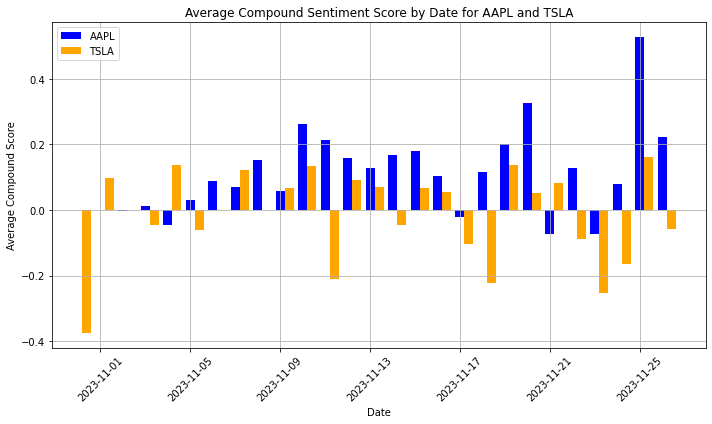

In [79]:
# Convert the 'date' column to datetime type
mean_df['date'] = pd.to_datetime(mean_df['date'])

plt.figure(figsize=(10, 6))

# Create a bar plot for AAPL
plt.bar(mean_df[mean_df['ticker'] == 'AAPL']['date'],
        mean_df[mean_df['ticker'] == 'AAPL']['compound'],
        width=0.4, label='AAPL', color='blue')

# Create a bar plot for TSLA, offset by 0.4 days for clarity
plt.bar(mean_df[mean_df['ticker'] == 'TSLA']['date'] + pd.Timedelta(days=0.4),
        mean_df[mean_df['ticker'] == 'TSLA']['compound'],
        width=0.4, label='TSLA', color='orange')

# Formatting the date labels to show the year, month, and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adding the axis labels and title
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Sentiment Score by Date for AAPL and TSLA')

# Adding a grid and a legend
plt.grid(True)
plt.legend()

# Show the plot with clear date labels including the year
plt.tight_layout()
plt.show()


## Correlational Analysis

Getting the numerical values for these stocks for more analysis

In [81]:
# Define the start and end date for the historical data
start_date = '2023-01-01'
end_date = '2023-12-03'

# Download the stock price data
df_stock = yf.download(tickers, start=start_date, end=end_date)

# Display the first few rows of the data
print(df_stock.head())

[*********************100%%**********************]  2 of 2 completed
             Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-01-03  124.374802  108.099998  125.070000  108.099998  130.899994   
2023-01-04  125.657639  113.639999  126.360001  113.639999  128.660004   
2023-01-05  124.325081  110.339996  125.019997  110.339996  127.769997   
2023-01-06  128.899521  113.059998  129.619995  113.059998  130.289993   
2023-01-09  129.426575  119.769997  130.149994  119.769997  133.410004   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-01-03  118.800003  124.169998  104.639999  130.279999  118.470001   
2023-01-04  114.589996  125.080002  107.51

In [82]:
# Select the 'Adj Close' prices for both AAPL and TSLA
adj_close_df = df_stock['Adj Close'].reset_index()
adj_close_df.columns = ['date', 'AAPL', 'TSLA']  


In [83]:
# Merge sentiment data with adjusted close price data
merged_df = pd.merge(mean_df, adj_close_df, on='date', how='inner')

# Create a 'stock_price' column and populate it based on the 'ticker' column
merged_df['stock_price'] = np.where(merged_df['ticker'] == 'AAPL', merged_df['AAPL'], merged_df['TSLA'])

# Drop the 'AAPL' and 'TSLA' columns as they are no longer needed
merged_df = merged_df.drop(['AAPL', 'TSLA'], axis=1)


In [84]:
merged_df 

,ticker,date,compound,stock_price
0,AAPL,2023-11-02,-0.002984,177.336380
1,TSLA,2023-11-02,-0.000991,218.509995
2,AAPL,2023-11-03,0.011203,176.417572
3,TSLA,2023-11-03,-0.044589,219.960007
4,AAPL,2023-11-06,0.087381,178.994186
5,TSLA,2023-11-06,0.000170,219.270004
6,AAPL,2023-11-07,0.068748,181.580780
7,TSLA,2023-11-07,0.121904,222.179993
8,AAPL,2023-11-08,0.151947,182.649368
9,TSLA,2023-11-08,0.001495,222.110001


In [67]:
#merged_df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/merged_df.csv', index=False)

In [85]:
# Calculate correlation for AAPL
aapl_corr = merged_df[merged_df['ticker'] == 'AAPL']['compound'].corr(merged_df[merged_df['ticker'] == 'AAPL']['stock_price'])

# Calculate correlation for TSLA
tsla_corr = merged_df[merged_df['ticker'] == 'TSLA']['compound'].corr(merged_df[merged_df['ticker'] == 'TSLA']['stock_price'])

print(f"AAPL Sentiment/Price Correlation: {aapl_corr}")
print(f"TSLA Sentiment/Price Correlation: {tsla_corr}")


AAPL Sentiment/Price Correlation: 0.29679019249669547
TSLA Sentiment/Price Correlation: 0.1567778444442962


- AAPL Sentiment/Price Correlation: 0.2968:

    - This value indicates a weak positive correlation for Apple Inc. (AAPL). A positive correlation means that, in general, as sentiment scores increase (i.e., more positive sentiment), the stock price of AAPL also tends to increase. However, the correlation coefficient of 0.2968 is relatively low, suggesting that while there is some association between the sentiment scores and stock prices, it is not very strong. Other factors not captured in the sentiment scores are likely playing a significant role in determining AAPL's stock price.
    

- TSLA Sentiment/Price Correlation: 0.1568:

    - This value indicates an even weaker positive correlation for Tesla Inc. (TSLA). Similar to AAPL, a positive correlation implies that higher sentiment scores are somewhat associated with higher stock prices for TSLA. But again, the correlation is quite weak (closer to 0), suggesting that sentiment scores, as measured here, have a limited influence on TSLA's stock price movements. This implies that other variables and factors are more influential in determining the stock price of TSLA.

In both cases, positive sentiment appears to have a positive impact on stock prices, but the correlations remain relatively weak. It means that while there is some association between sentiment and stock prices, sentiment alone may not be the primary driver of stock price movements for these companies. Other factors and analyses are likely needed to make informed investment decisions.

## Lagged Correlation Analysis

This analysis will help us determine if there's a time delay between changes in news sentiment and stock price movements. We'll calculate the correlation between news sentiment and stock prices for different lag times (1 or 2 days). For instance, we might find that today's news sentiment has a stronger correlation with tomorrow's stock price than with today's price.

In [86]:
# Define the lag times
lag_times = [1, 2]

# Initialize a dictionary to store correlation results
lagged_correlations = {'AAPL': {}, 'TSLA': {}}

# Calculate the correlation for each lag time and each stock
for lag in lag_times:
    # Shift the sentiment scores
    merged_df_shifted = merged_df.copy()
    merged_df_shifted['compound'] = merged_df_shifted.groupby('ticker')['compound'].shift(-lag)

    # Calculate correlation for each stock
    for ticker in ['AAPL', 'TSLA']:
        df_ticker = merged_df_shifted[merged_df_shifted['ticker'] == ticker]
        corr = df_ticker['compound'].corr(df_ticker['stock_price'])  # Use 'stock_price' instead of the ticker column
        lagged_correlations[ticker][lag] = corr
lagged_correlations

{'AAPL': {1: 0.00495011985463431, 2: -0.0260156123070147},
 'TSLA': {1: -0.4212258965187385, 2: -0.3914730881375183}}

- AAPL
    - The correlation values for AAPL show interesting dynamics. At a lag of 1 day, there is a slight positive correlation of 0.0049, suggesting that an increase in sentiment scores is weakly associated with a small increase in stock price after 1 day. However, at a lag of 2 days, there is a stronger negative correlation of -0.0260, indicating that higher sentiment scores are somewhat associated with a decrease in stock price after 2 days. It's essential to note that both correlation values are relatively close to zero, suggesting a weak and somewhat unpredictable relationship between sentiment and stock prices for AAPL.

- TSLA
    - For TSLA, the correlation values are more pronounced. At a lag of 1 day, there is a substantial negative correlation of -0.4212, indicating a strong inverse relationship between sentiment scores and stock prices. In simpler terms, higher sentiment scores are consistently followed by lower stock prices after 1 day. At a lag of 2 days, the negative correlation remains strong at -0.3915, suggesting a persistent inverse relationship between sentiment and stock prices, even after 2 days.

These correlation results suggest that for TSLA, sentiment scores have a more immediate and pronounced impact on stock prices, especially within a day. In contrast, AAPL exhibits a weaker and less predictable relationship between sentiment and stock prices. However, it's crucial to consider that correlation does not imply causation, and other factors may also influence stock price movements. Further analysis and consideration of these factors are necessary for making informed investment decisions.

## Category-Based Sentiment Analysis

In [87]:
# Categorizing news as positive or negative
merged_df['news_category'] = np.where(merged_df['compound'] > 0, 'Positive', 'Negative')
merged_df

,ticker,date,compound,stock_price,news_category
0,AAPL,2023-11-02,-0.002984,177.336380,Negative
1,TSLA,2023-11-02,-0.000991,218.509995,Negative
2,AAPL,2023-11-03,0.011203,176.417572,Positive
3,TSLA,2023-11-03,-0.044589,219.960007,Negative
4,AAPL,2023-11-06,0.087381,178.994186,Positive
5,TSLA,2023-11-06,0.000170,219.270004,Positive
6,AAPL,2023-11-07,0.068748,181.580780,Positive
7,TSLA,2023-11-07,0.121904,222.179993,Positive
8,AAPL,2023-11-08,0.151947,182.649368,Positive
9,TSLA,2023-11-08,0.001495,222.110001,Positive


In [88]:

# Calculate the average sentiment score for each news category
average_sentiment = merged_df.groupby('news_category')['compound'].mean().reset_index()

# Separate the dataset into two groups based on news category
positive_sentiment = merged_df[merged_df['news_category'] == 'Positive']
negative_sentiment = merged_df[merged_df['news_category'] == 'Negative']

# Calculate the correlation between average sentiment and stock price for AAPL
aapl_positive_corr = positive_sentiment[positive_sentiment['ticker'] == 'AAPL']['compound'].corr(positive_sentiment[positive_sentiment['ticker'] == 'AAPL']['stock_price'])
aapl_negative_corr = negative_sentiment[negative_sentiment['ticker'] == 'AAPL']['compound'].corr(negative_sentiment[negative_sentiment['ticker'] == 'AAPL']['stock_price'])

# Calculate the correlation between average sentiment and stock price for TSLA
tsla_positive_corr = positive_sentiment[positive_sentiment['ticker'] == 'TSLA']['compound'].corr(positive_sentiment[positive_sentiment['ticker'] == 'TSLA']['stock_price'])
tsla_negative_corr = negative_sentiment[negative_sentiment['ticker'] == 'TSLA']['compound'].corr(negative_sentiment[negative_sentiment['ticker'] == 'TSLA']['stock_price'])

# Display the results
print(f"AAPL Positive Sentiment/Price Correlation: {aapl_positive_corr}")
print(f"AAPL Negative Sentiment/Price Correlation: {aapl_negative_corr}")
print(f"TSLA Positive Sentiment/Price Correlation: {tsla_positive_corr}")
print(f"TSLA Negative Sentiment/Price Correlation: {tsla_negative_corr}")


AAPL Positive Sentiment/Price Correlation: 0.5888706702538862
AAPL Negative Sentiment/Price Correlation: -0.7274376746389664
TSLA Positive Sentiment/Price Correlation: -0.16401498802156497
TSLA Negative Sentiment/Price Correlation: 0.584248591516977


- AAPL:

    - Positive Sentiment/Price Correlation (0.5889): This value indicates a moderate positive correlation for Apple Inc. (AAPL). A positive correlation suggests that, in general, as positive sentiment in news articles increases, the stock price of AAPL also tends to increase. The correlation coefficient of 0.5889 suggests a moderate strength in this positive relationship, meaning that positive news sentiment is moderately associated with higher stock prices for AAPL.
    - Negative Sentiment/Price Correlation (-0.7274): The correlation of -0.7274 represents a strong negative correlation for AAPL. It suggests that as negative sentiment in news articles increases, the stock price of AAPL tends to decrease. However, it's essential to note that this correlation is unusually strong, and further analysis may be needed to understand the factors contributing to such a strong inverse relationship.

- TSLA:

    - Positive Sentiment/Price Correlation (-0.1640): This value indicates a weak negative correlation for Tesla Inc. (TSLA). A negative correlation implies that an increase in positive sentiment in news articles is weakly associated with a decrease in TSLA's stock price. The correlation coefficient of -0.1640 suggests a relatively weak relationship, implying that positive news sentiment does not strongly influence TSLA's stock price movements.
    - Negative Sentiment/Price Correlation (0.5842): The moderately strong positive correlation of 0.5842 for negative sentiment in TSLA news is intriguing. It suggests that as negative sentiment increases, the stock price of TSLA might also increase. This unexpected relationship could be influenced by specific market dynamics or investor behavior unique to TSLA. Further investigation and consideration of contextual factors may be necessary to fully understand this correlation.


## Time Series Analysis

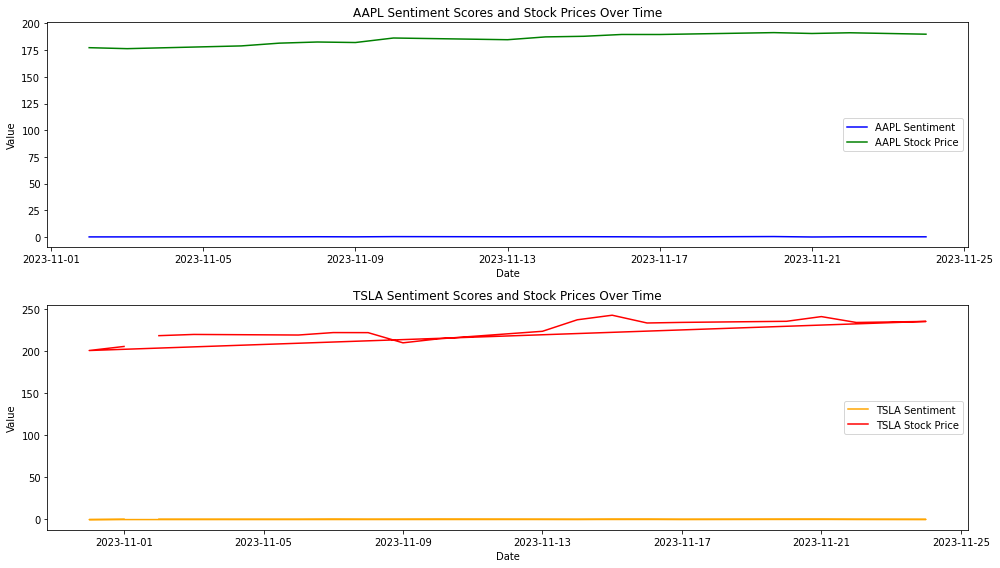

In [50]:
# ensure that the 'date' column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# create separate dataframes for AAPL and TSLA
aapl_data = merged_df[merged_df['ticker'] == 'AAPL']
tsla_data = merged_df[merged_df['ticker'] == 'TSLA']

# Plotting the time series data
plt.figure(figsize=(14, 8))

# Plot for AAPL
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(aapl_data['date'], aapl_data['compound'], label='AAPL Sentiment', color='blue')
plt.plot(aapl_data['date'], aapl_data['stock_price'], label='AAPL Stock Price', color='green')
plt.title('AAPL Sentiment Scores and Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot for TSLA
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(tsla_data['date'], tsla_data['compound'], label='TSLA Sentiment', color='orange')
plt.plot(tsla_data['date'], tsla_data['stock_price'], label='TSLA Stock Price', color='red')
plt.title('TSLA Sentiment Scores and Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


- Correlation and Causality: While there are fluctuations in sentiment and stock prices, it's important to note that correlation does not imply causality. The plots show how these two metrics move over time but do not confirm that changes in sentiment directly cause stock price movements.

- Sensitivity to News: TSLA appears to have more pronounced changes in stock price that somewhat mirror sentiment changes. This might suggest that TSLA's stock is more sensitive to public sentiment or news events compared to AAPL.

- Need for Detailed Analysis: To draw more concrete conclusions, a more detailed analysis is required. This could include examining specific time periods, considering external events (like product launches or economic changes), and applying statistical methods to test for causation.